##### Setup

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx.algorithms.community as nx_comm
import matplotlib.cm as cm
from collections import defaultdict
from operator import itemgetter
import collections 

In [2]:
G = nx.read_edgelist("ca-CSphd/ca-CSphd.mtx")
nx.write_gml(G,"CSphd.gml")

##### Degrees

In [88]:
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
print('Avg degree: ' + str(round(np.mean(list(dict(G.degree()).values())),2)))
print('Variance: ' + str(round(np.std(list(dict(G.degree()).values())),2)))
print('Density: ' + str(round(nx.density(G),5)))
print('Min: ' + str(np.min(list(dict(G.degree()).values()))))
print('Max: ' + str(np.max(list(dict(G.degree()).values()))))

Number of nodes: 1882
Number of edges: 1740
Avg degree: 1.85
Variance: 2.34
Density: 0.00098
Min: 1
Max: 46


In [9]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
print(f'Number of nodes: {G0.number_of_nodes()}')
print(f'Number of edges: {G0.number_of_edges()}')
print('Avg degree: ' + str(round(np.mean(list(dict(G0.degree()).values())),2)))
print('Variance: ' + str(round(np.std(list(dict(G0.degree()).values())),2)))
print('Density: ' + str(round(nx.density(G0),5)))
print('Min: ' + str(np.min(list(dict(G0.degree()).values()))))
print('Max: ' + str(np.max(list(dict(G0.degree()).values()))))

Number of nodes: 1025
Number of edges: 1043
Avg degree: 2.04
Variance: 2.83
Density: 0.00199
Min: 1
Max: 46


In [30]:
erdos_renyi = nx.gnp_random_graph(nx.number_of_nodes(G), nx.density(G))
print(f'Number of nodes: {erdos_renyi.number_of_nodes()}')
print(f'Number of edges: {erdos_renyi.number_of_edges()}')
print('Avg degree: ' + str(round(np.mean(list(dict(erdos_renyi.degree()).values())),2)))
print('Variance: ' + str(round(np.std(list(dict(erdos_renyi.degree()).values())),2)))
print('Density: ' + str(round(nx.density(erdos_renyi),5)))
print('Min: ' + str(np.min(list(dict(erdos_renyi.degree()).values()))))
print('Max: ' + str(np.max(list(dict(erdos_renyi.degree()).values()))))

Number of nodes: 1882
Number of edges: 1696
Avg degree: 1.8
Variance: 1.35
Density: 0.00096
Min: 0
Max: 9


##### Scale Free vs Random

<AxesSubplot: xlabel='degree', ylabel='count'>

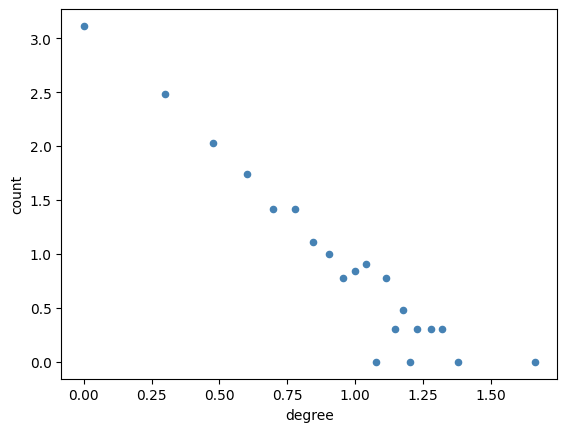

In [62]:
counter = collections.Counter(np.log10(list(dict(G.degree()).values())))
df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df[0] = np.log10(df[0])
df.sort_values(by="index").rename(columns = {'index':'degree', 0:'count'}).plot.scatter(x='degree',y="count",color="steelblue")

<AxesSubplot: xlabel='degree', ylabel='count'>

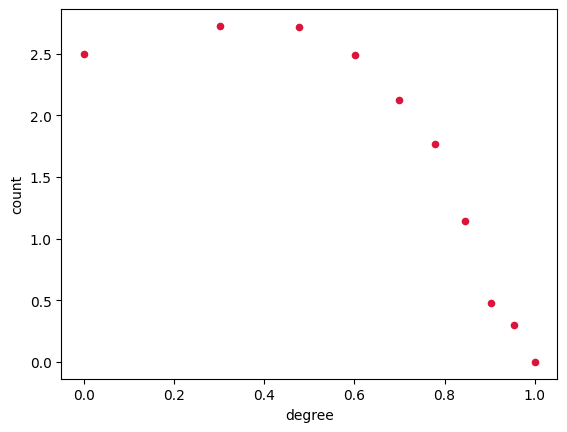

In [63]:
counter = collections.Counter(np.log10([x+1 for x in list(dict(erdos_renyi.degree()).values())]))
df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df[0] = np.log10(df[0])
df.sort_values(by="index").rename(columns = {'index':'degree', 0:'count'}).plot(x='degree',y="count",kind="scatter",color="crimson")

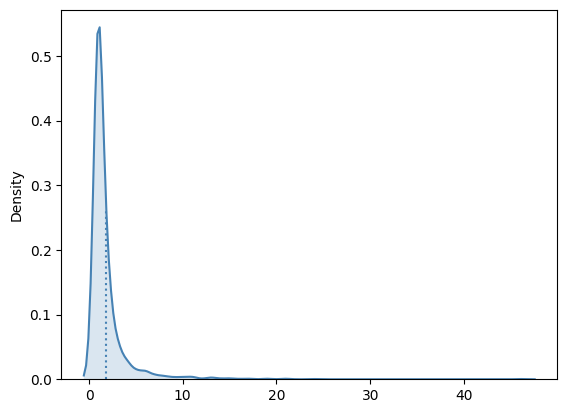

In [9]:
degrees = list(dict(G.degree()).values())
ax = sns.kdeplot(degrees,color="steelblue")
kdeline = ax.lines[0]
mean = np.mean(degrees)
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color='steelblue', ls=':')
ax.fill_between(xs, 0, ys, facecolor='steelblue', alpha=0.2)
plt.show()

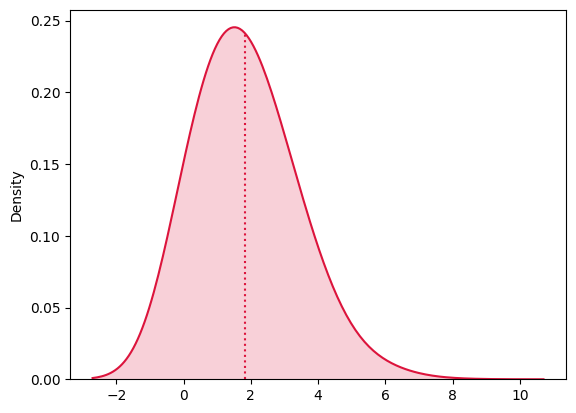

In [10]:
degrees = list(dict(erdos_renyi.degree()).values())
ax = sns.kdeplot(degrees,color="crimson",bw_adjust=3)
kdeline = ax.lines[0]
mean = np.mean(degrees)
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color='crimson', ls=':')
ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
plt.show()

##### Shortest paths

In [84]:
nx.diameter(G0), nx.average_shortest_path_length(G0)

(28, 11.748410823170731)

In [31]:
ERcc = sorted(nx.connected_components(erdos_renyi), key=len, reverse=True)
ER0 = erdos_renyi.subgraph(ERcc[0])

In [98]:

nx.diameter(ER0), nx.average_shortest_path_length(ER0)

(29, 10.644139266559195)

##### Connected components

In [64]:
nx.is_connected(G)

False

In [65]:
conn_comps= nx.connected_components(erdos_renyi)
conn_sizes = [len(con_c) for con_c in list(conn_comps)]
counter = collections.Counter(np.log10(conn_sizes))
sizes = collections.Counter(conn_sizes)
print(pd.DataFrame.from_dict(sizes, orient='index').reset_index().sort_values(by="index").rename(columns = {'index':'size', 0:'count'}))
print(f'Percentage of nodes in the biggest connected component: { round(sorted(sizes)[-1]/G.number_of_nodes(),3) }%')

   size  count
3     1    315
1     2     40
2     3     15
5     4      4
6     5      1
7     6      1
4     7      1
0  1408      1
Percentage of nodes in the biggest connected component: 0.748%


<AxesSubplot: xlabel='size', ylabel='count'>

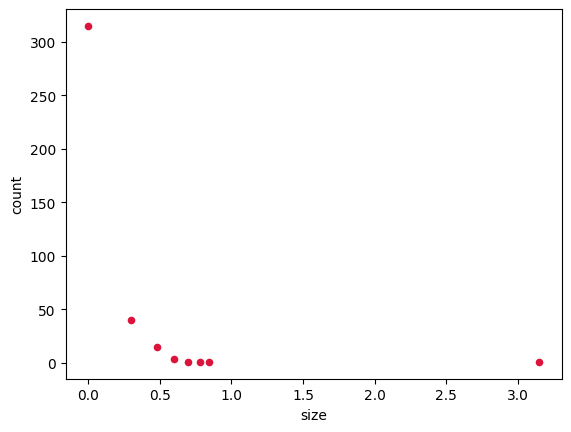

In [66]:
pd.DataFrame.from_dict(counter, orient='index').reset_index().sort_values(by="index").rename(columns = {'index':'size', 0:'count'}).plot.scatter(x='size',y="count",color="crimson")

In [67]:
conn_comps= nx.connected_components(G)
conn_sizes = [len(con_c) for con_c in list(conn_comps)]
counter = collections.Counter(np.log10(conn_sizes))
sizes = collections.Counter(conn_sizes)
print(pd.DataFrame.from_dict(sizes, orient='index').reset_index().sort_values(by="index").rename(columns = {'index':'size', 0:'count'}))
print(f'Percentage of nodes in the biggest connected component: { round(sorted(sizes)[-1]/G.number_of_nodes(),3) }%')

    size  count
1      2     83
7      3     26
6      4     16
13     5      7
12     6      4
11     7      6
19     8      4
2      9      1
23    10      1
15    11      3
16    12      1
4     13      1
17    14      2
3     15      2
21    16      1
22    18      1
14    19      1
5     22      2
10    23      1
20    24      1
8     42      1
9     44      1
18    51      1
0   1025      1
Percentage of nodes in the biggest connected component: 0.545%


<AxesSubplot: xlabel='size', ylabel='count'>

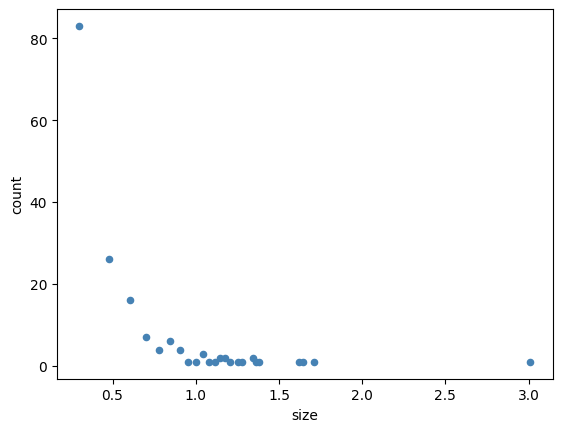

In [68]:
pd.DataFrame.from_dict(counter, orient='index').reset_index().sort_values(by="index").rename(columns = {'index':'size', 0:'count'}).plot.scatter(x='size',y="count",color="steelblue")

##### Clustering Coefficient

In [46]:
print('Transitivity: ' + str(round(nx.transitivity(erdos_renyi),5))) 

Transitivity: 0.00094


In [47]:
print('Transitivity: ' + str(round(nx.transitivity(G0),4))) 

Transitivity: 0.0023


In [50]:
print('Transitivity: ' + str(round(nx.transitivity(G),4))) 

Transitivity: 0.0036


In [51]:
print('Avg clustering coefficient: ' + str(round(nx.average_clustering(erdos_renyi),4))) 

Avg clustering coefficient: 0.0006


In [52]:
print('Avg clustering coefficient: ' + str(round(nx.average_clustering(G),4))) 

Avg clustering coefficient: 0.0051


In [53]:
print('Avg clustering coefficient: ' + str(round(nx.average_clustering(G0),4))) 

Avg clustering coefficient: 0.0034


Plot of clustering coefficient by degree


<AxesSubplot: xlabel='degree'>

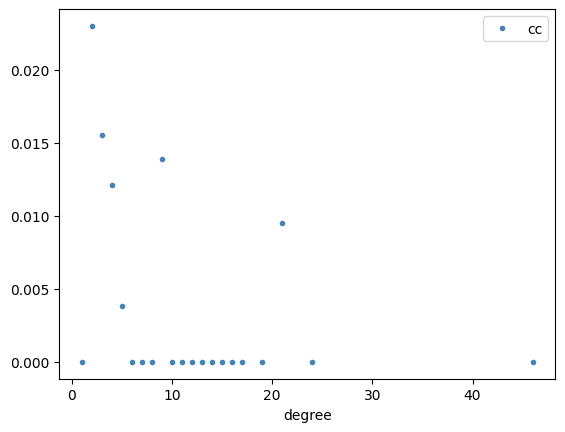

In [54]:
clustering_coeff_by_node= nx.clustering(G)
degree_by_node = dict(G.degree)

dd = collections.defaultdict(list)
 
for d in (clustering_coeff_by_node, degree_by_node): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print("Plot of clustering coefficient by degree")
df = pd.DataFrame.from_dict(dict(dd), orient='index').rename(columns = {0:'cc', 1:'degree'})
df.groupby("degree").mean().plot(marker='.', linestyle='none',color="steelblue")

##### Degree assortativity

In [55]:
nx.degree_assortativity_coefficient(G)

-0.19661057645360294

In [56]:
nx.degree_assortativity_coefficient(G0)

-0.25318822336578806

In [57]:
nx.degree_assortativity_coefficient(erdos_renyi)

0.025388563582388102

Plot of avg neighbors degree by degree


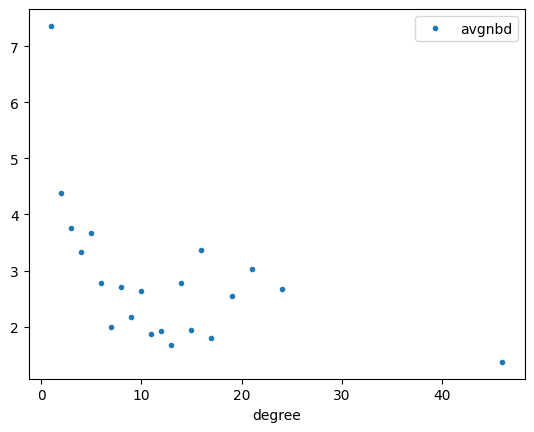

In [58]:
avg_neighbor_degree_node= nx.average_neighbor_degree(G)
degree_by_node = dict(G.degree)

dd = collections.defaultdict(list)
 
for d in (avg_neighbor_degree_node, degree_by_node): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print("Plot of avg neighbors degree by degree")
df = pd.DataFrame.from_dict(dict(dd), orient='index').rename(columns = {0:'avgnbd', 1:'degree'})
df.groupby("degree").mean().plot(marker='.', linestyle='none')
plt.show()

Plot of avg neighbors degree by degree


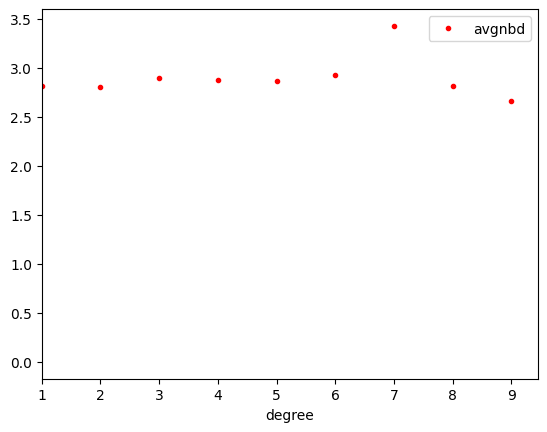

In [59]:
avg_neighbor_degree_node= nx.average_neighbor_degree(erdos_renyi)
degree_by_node = dict(erdos_renyi.degree)

dd = collections.defaultdict(list)
 
for d in (avg_neighbor_degree_node, degree_by_node): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print("Plot of avg neighbors degree by degree")
df = pd.DataFrame.from_dict(dict(dd), orient='index').rename(columns = {0:'avgnbd', 1:'degree'})
df.groupby("degree").mean().plot(marker='.', linestyle='none',color="red").set_xlim(1,)
plt.show()

##### Reciprocity

In [60]:
G_directed = nx.read_edgelist("ca-CSphd/ca-CSphd.mtx", create_using=nx.DiGraph)

In [61]:
print('Avg clustering coefficient: ' + str(round(nx.reciprocity(G_directed),2))) 

Avg clustering coefficient: 0.0


##### Community detection

Greedy Modularity Maximization

In [3]:
list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(G))
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    for n in comm:
        partition_greedy[n] = i
nx.set_node_attributes(G, partition_greedy, 'comm_greedy')

Louvain

In [4]:
list_sets_louv = nx_comm.louvain_communities(G)
partition_louv = {}
for i, comm in enumerate(list_sets_louv):
    for n in comm:
        partition_louv[n] = i
nx.set_node_attributes(G, partition_louv, 'comm_louvain')

Evaluation of communities

In [5]:
lengths = []
for insieme in list_sets_louv:
    lengths.append(len(insieme))

In [6]:
list_community_sets_louvain = [set() for i in range(len(partition_louv))]
for n, louv_communities in partition_louv.items():
    list_community_sets_louvain[louv_communities].add(n)

In [7]:
#Modularity
print('Modularity: ', nx_comm.modularity(G, list_community_sets_louvain))

Coverage:  (0.9816091954022989, 0.9838685529719704)
Modularity:  0.9608610780816509


Size of communities

Number of communities: 188


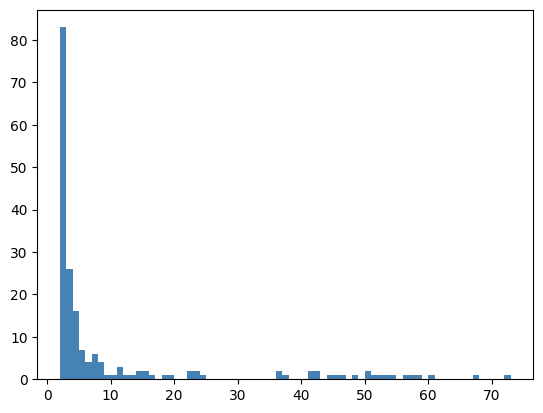

In [99]:
plt.hist(lengths,bins=range(min(lengths), max(lengths) + 1, 1),color="steelblue")
print("Number of communities: "+str(len(lengths)))
plt.show()

In [27]:
list_sets_louv2 = nx_comm.louvain_communities(G0)
print(len(list_sets_louv2))
partition_louv2 = {}
for i, comm in enumerate(list_sets_louv2):
    for n in comm:
        partition_louv2[n] = i

list_community_sets_louvain2 = [set() for i in range(len(partition_louv2))]
for n, louv_communities in partition_louv2.items():
    list_community_sets_louvain2[louv_communities].add(n)

print('Modularity: ', nx_comm.modularity(G0, list_community_sets_louvain2))

30
Modularity:  0.9243874839246992


In [32]:
list_sets_louv2 = nx_comm.louvain_communities(ER0)
print(len(list_sets_louv2))
partition_louv2 = {}
for i, comm in enumerate(list_sets_louv2):
    for n in comm:
        partition_louv2[n] = i

list_community_sets_louvain2 = [set() for i in range(len(partition_louv2))]
for n, louv_communities in partition_louv2.items():
    list_community_sets_louvain2[louv_communities].add(n)

print('Modularity: ', nx_comm.modularity(ER0, list_community_sets_louvain2))

32
Modularity:  0.8394824438251242


##### Betweeness Centrality

In [ ]:
betweenness = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness, 'betweenness')

##### Write gephi file

In [ ]:
nx.write_gexf(G = G, path = 'project.gexf')